In [337]:
import fastf1.core
# import the dependencies
import pandas as pd
import numpy as np
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# Enable cache and setup plotting
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')
# Load the session
fps_name = ["FP1", "FP2"]
fps = {name: None for name in fps_name}
for name in fps_name:
    fp = ff1.get_session(2023, 'Monza', name)
    fp.load(laps=True, telemetry=True, weather=False, messages=False)
    fps[name] = fp

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.0.7]
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '4', '10', '11', '14', '16', '20', '22', '23', '24', '27', '31', '34', '40', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.0.7]
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this ses

In [338]:
import colorsys
def mix_colors(color1, color2):
    rgb1 = colors.to_rgb(color1)
    rgb2 = colors.to_rgb(color2)
    blended_rgb = tuple((c1 + c2) / 2 for c1, c2 in zip(rgb1, rgb2))
    blended_hex = colors.to_hex(blended_rgb)
    return blended_hex

In [339]:
def create_driver_compounds_laps(session: fastf1.core.Session, drivers: list[str]):
    laps = session.laps
    
    # Split by driver
    driver_laps = {driver: laps.pick_driver(driver).pick_wo_box().pick_quicklaps(1.10) for driver in drivers}
    
    # Split by compound
    driver_compounds = {driver: driver_laps[driver]['Compound'].unique() for driver in drivers}
    driver_compound_laps = {driver: {compound: driver_laps[driver].pick_tyre(compound) for compound in driver_compounds[driver]} for driver in drivers}
    
    # Split by stint
    driver_compound_stints = {driver: {compound: driver_compound_laps[driver][compound]['Stint'].unique() for compound in driver_compounds[driver]} for driver in drivers}
    
    driver_compound_stint_laps = {driver: {compound: {stint: driver_compound_laps[driver][compound][driver_compound_laps[driver][compound]['Stint'] == stint] for stint in driver_compound_stints[driver][compound]} for compound in driver_compounds[driver]} for driver in drivers}
    return driver_compound_stint_laps

In [340]:
def plot_driver_stint_laps(name: str, driver_compound_stint_laps: dict):
    plt.figure(figsize=(16, 5))
    plt.title(name)
    for driver in driver_compound_stint_laps.keys():
        driver_color = fastf1.plotting.DRIVER_COLORS[fastf1.plotting.DRIVER_TRANSLATE[driver]]
        for compound in driver_compound_stint_laps[driver].keys():
            compound_color = fastf1.plotting.COMPOUND_COLORS[compound]
            for stint in driver_compound_stint_laps[driver][compound].keys():
                lap_number = driver_compound_stint_laps[driver][compound][stint]['LapNumber']
                lap_time = driver_compound_stint_laps[driver][compound][stint]['LapTime']
                print(lap_number)
                print(lap_time)
                color = mix_colors(compound_color, driver_color)
                plt.plot(lap_number, lap_time, label=f"{driver} {int(stint)} {compound}", marker='o', color=color)
    plt.legend()
    plt.show()

1    2.0
3    4.0
5    6.0
7    8.0
Name: LapNumber, dtype: float64
1   0 days 00:01:24.969000
3   0 days 00:01:23.479000
5   0 days 00:01:23.027000
7   0 days 00:01:22.657000
Name: LapTime, dtype: timedelta64[ns]
10    11.0
12    13.0
Name: LapNumber, dtype: float64
10   0 days 00:01:22.779000
12   0 days 00:01:22.659000
Name: LapTime, dtype: timedelta64[ns]
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
24    25.0
25    26.0
27    28.0
28    29.0
Name: LapNumber, dtype: float64
15   0 days 00:01:27.017000
16   0 days 00:01:26.667000
17   0 days 00:01:26.895000
18   0 days 00:01:26.409000
19   0 days 00:01:26.506000
20   0 days 00:01:26.602000
21   0 days 00:01:26.474000
22   0 days 00:01:26.399000
24   0 days 00:01:26.681000
25   0 days 00:01:26.653000
27   0 days 00:01:26.371000
28   0 days 00:01:26.294000
Name: LapTime, dtype: timedelta64[ns]
101    2.0
103    4.0
105    6.0
107    8.0
Name: LapNumber, dtype: float64
101   0 days 00:01:24.62

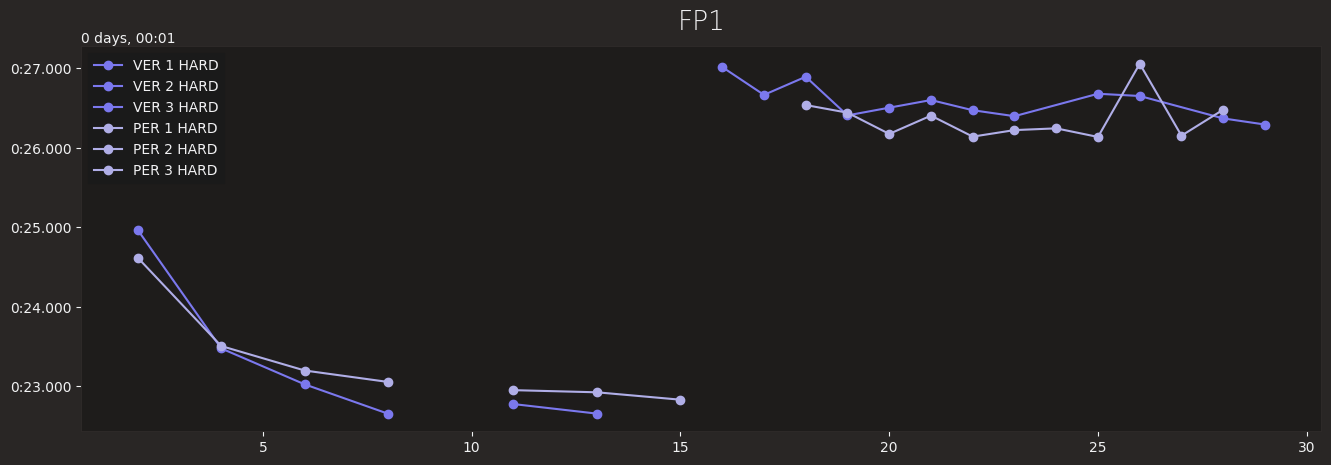

3    4.0
5    6.0
Name: LapNumber, dtype: float64
3   0 days 00:01:22.259000
5   0 days 00:01:22.244000
Name: LapTime, dtype: timedelta64[ns]
11    12.0
12    13.0
13    14.0
Name: LapNumber, dtype: float64
11   0 days 00:01:25.807000
12   0 days 00:01:25.733000
13   0 days 00:01:25.286000
Name: LapTime, dtype: timedelta64[ns]
16    17.0
17    18.0
Name: LapNumber, dtype: float64
16   0 days 00:01:25.337000
17   0 days 00:01:26.075000
Name: LapTime, dtype: timedelta64[ns]
8    9.0
Name: LapNumber, dtype: float64
8   0 days 00:01:21.631000
Name: LapTime, dtype: timedelta64[ns]
89    4.0
92    7.0
Name: LapNumber, dtype: float64
89   0 days 00:01:22.350000
92   0 days 00:01:22.178000
Name: LapTime, dtype: timedelta64[ns]
98     13.0
99     14.0
100    15.0
101    16.0
Name: LapNumber, dtype: float64
98    0 days 00:01:25.635000
99    0 days 00:01:25.400000
100   0 days 00:01:25.333000
101   0 days 00:01:25.494000
Name: LapTime, dtype: timedelta64[ns]
95    10.0
Name: LapNumber, dtype: fl

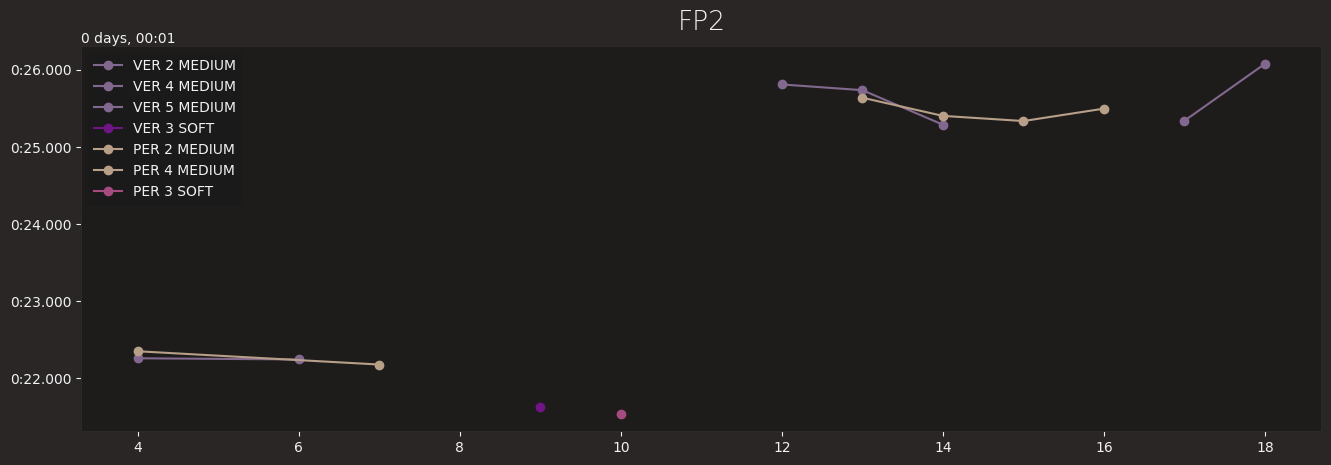

In [341]:
drivers = ["VER", "PER"]
stints = {name: create_driver_compounds_laps(fps[name], drivers) for name in fps_name}
for name, stint in stints.items():
    plot_driver_stint_laps(name, stint)